## LLamaIndex and Gemini - Quickstart

LlamaIndex is the leading data framework for building LLM applications. Using this framework lets integrate Gemini as the large language model to built Chat with Image.

### Installation

In [ ]:
!pip install llama-index 'google-generativeai>=0.3.0'

## Approach-1 Using Image URL

In [ ]:
import os
from getpass import getpass

google_api_key = getpass()
os.environ['GOOGLE_API_KEY'] = google_api_key

··········


In [ ]:
IMAGE_URL = "https://p.imgci.com/db/PICTURES/CMS/371200/371206.4.jpg"

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

import requests
from io import BytesIO

### Display Image

(-0.5, 899.5, 505.5, -0.5)

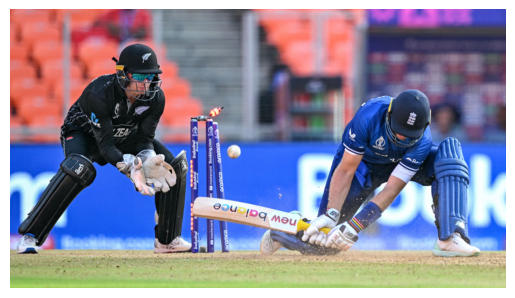

In [ ]:
response = requests.get(IMAGE_URL)
img = Image.open(BytesIO(response.content))
plt.imshow(img)
plt.axis("off")

### Initialize Gemini as the Multimodal - LLM

In [ ]:
from llama_index.multi_modal_llms.generic_utils import load_image_urls
from llama_index.multi_modal_llms.gemini import GeminiMultiModal

In [ ]:
image_document1 = load_image_urls([IMAGE_URL])

In [ ]:
gemini_pro = GeminiMultiModal(model_name="models/gemini-pro-vision")

### Run prediction

In [ ]:
response = gemini_pro.complete(
    prompt = "name both the team names and also describe the image",
    image_documents = image_document1
)

In [ ]:
print(response)

 The image shows a cricket match between New Zealand and England. The New Zealand player is the wicket-keeper and the England player is the batsman. The wicket-keeper is taking the bails off the stumps to appeal for a wicket. The batsman is out of his crease and is trying to get back in time. The umpire is signaling that the batsman is out.


## Approach-2 Using Image File

Note, create a folder with the name `data` and same any image of your choice and execute ``SimpleDirectoryReader``

This is the input image inside `data`:

![input_img](https://e1.pxfuel.com/desktop-wallpaper/1004/93/desktop-wallpaper-luffy-x-naruto-naruto-and-luffy.jpg)

In [ ]:
from llama_index import SimpleDirectoryReader

image_document2 = SimpleDirectoryReader("./data").load_data()

In [ ]:
response2 = gemini_pro.complete(
    prompt = "who are the characters and whats so special about them",
    image_documents=image_document2
)

In [ ]:
print(response2)

 Monkey D. Luffy is the main protagonist of the anime series One Piece. He is a cheerful, optimistic young man who dreams of becoming the Pirate King. He is highly loyal to his friends and crew and is always willing to fight for what he believes in.

Naruto Uzumaki is the main protagonist of the anime series Naruto. He is a loud, hyperactive ninja who dreams of becoming the Hokage, the leader of his village. He is a loyal friend and teammate and is always willing to help those in need.


In [ ]:
response3 = gemini_pro.complete(
    prompt = "name the side characters who are very close to both the characters as given in the image",
    image_documents=image_document2
)

In [ ]:
print(response3)

 Roronoa Zoro and Sasuke Uchiha
